In [1]:
import serial
import pyvisa
import visa
import serial
import time
import pandas
from tqdm import tqdm
%pylab notebook
from IPython.display import clear_output
import seaborn as seabornInstance 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

class WlMeter(object):
    def __init__(self, port=4):
        rm = visa.ResourceManager()
        try:
            self.i = rm.open_resource("GPIB::%d" % port)
            self.connected = True

            self.i.write(":INIT:CONT OFF")
        except visa.VisaIOError:
            self.connected = False

    def ok(self):
        return self.connected

    def wl(self):
        # let this func fail silently
        if self.connected:
            return float(self.i.query(":MEAS:SCAL:POW:WAV?"))
        else:
            return 0

    def power(self):
        if self.connected:
            return float(self.i.query("MEAS:POW?"))
        else:
            return 0

Populating the interactive namespace from numpy and matplotlib


In [2]:
#OPEN THORLABS

# If the device cannot be found, but works with Thorlabs UI, 
# go to C:\Program Files (x86)\Thorlabs\PowerMeters\Tools\DriverSwitcher
# And run Thorlabs.PMDriverSwitcher.exe to switch drivers to visa.


rm = pyvisa.ResourceManager()
resources = rm.list_resources()
print(resources)
inst = rm.open_resource(resources[0])
print(inst.query("*IDN?"))

def read_thorlabs_power(n=5):
    return max([float(inst.query("MEAS:POW?")) for i in range(n)])

('USB0::0x1313::0x8078::PM002048::INSTR', 'GPIB0::20::INSTR', 'GPIB0::27::INSTR', 'GPIB0::4::INSTR')
Thorlabs,PM100D,PM002048,2.3.0



In [3]:
voltages = np.linspace(0, 4, 21)
thorlabs_powers = []

In [4]:
thorlabs_powers.append(read_thorlabs_power(100))

In [5]:
thorlabs_powers.append(read_thorlabs_power(100))

In [6]:
thorlabs_powers.append(read_thorlabs_power(100))

In [7]:
thorlabs_powers.append(read_thorlabs_power(100))

In [8]:
thorlabs_powers.append(read_thorlabs_power(100))

In [9]:
thorlabs_powers.append(read_thorlabs_power(100))

In [10]:
thorlabs_powers.append(read_thorlabs_power(100))

In [11]:
thorlabs_powers.append(read_thorlabs_power(100))

In [12]:
thorlabs_powers.append(read_thorlabs_power(100))

In [13]:
thorlabs_powers.append(read_thorlabs_power(100))

In [14]:
thorlabs_powers.append(read_thorlabs_power(100))

In [15]:
thorlabs_powers.append(read_thorlabs_power(100))

In [16]:
thorlabs_powers.append(read_thorlabs_power(100))

In [17]:
thorlabs_powers.append(read_thorlabs_power(100))

In [18]:
thorlabs_powers.append(read_thorlabs_power(100))

In [19]:
thorlabs_powers.append(read_thorlabs_power(100))

In [20]:
thorlabs_powers.append(read_thorlabs_power(100))

In [21]:
thorlabs_powers.append(read_thorlabs_power(100))

In [22]:
thorlabs_powers.append(read_thorlabs_power(100))

In [23]:
thorlabs_powers.append(read_thorlabs_power(100))

In [24]:
thorlabs_powers.append(read_thorlabs_power(100))

In [620]:
#total_powers = []
total_powers.append(thorlabs_powers)

In [26]:
savetxt("EOM_centerband_750MHz_0_02_4_rev",thorlabs_powers , delimiter=",")

<IPython.core.display.Javascript object>


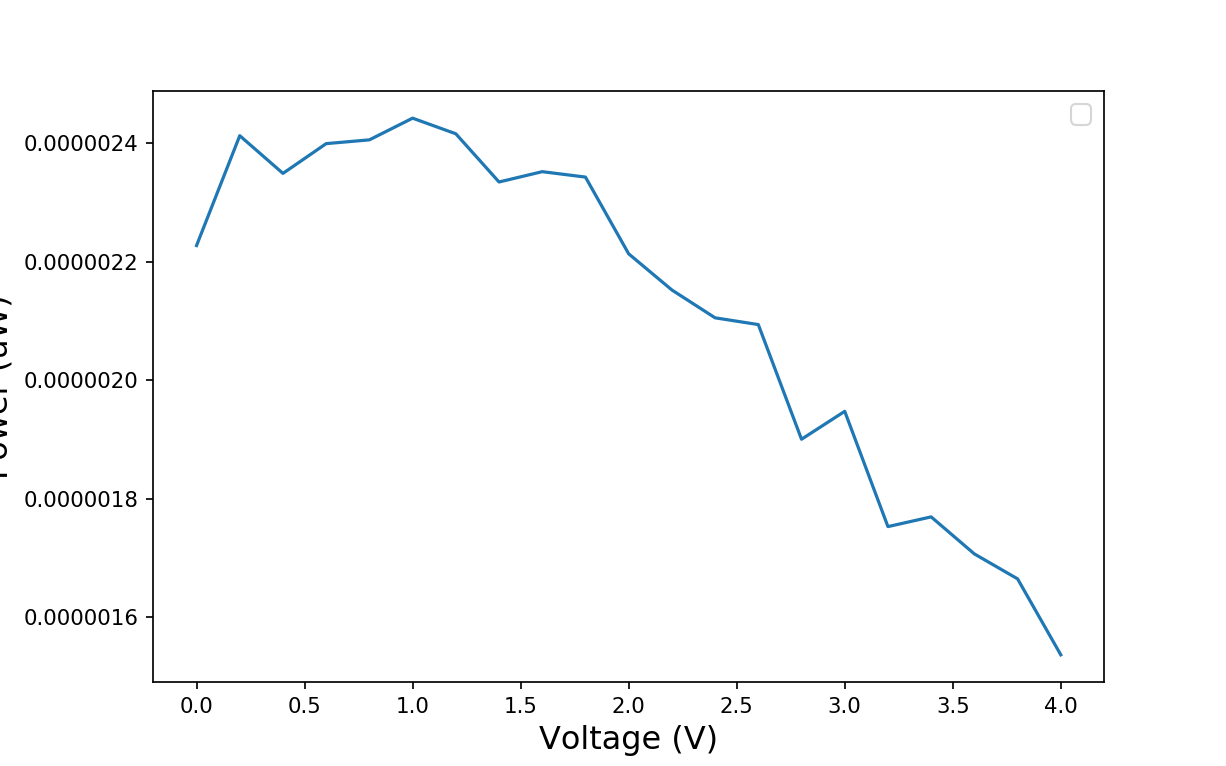

No handles with labels found to put in legend.


Text(0.5, 1.0, '')

In [25]:
#Plot thorlabs power
#numpts = len(dac_codes)
fig = plt.figure(figsize=(8, 5), frameon=True)
plt.subplots_adjust(hspace=0.0)
fig.set_facecolor('w')
#offset = 4095/694.74 #38.68mA for 1550nm, 694.74mA for 980nm

ax1 = plt.subplot(1,1,1)
ax1.plot(voltages, thorlabs_powers)
ax1.legend(loc=0, fontsize = 12, ncol = 2)
#ax1.set_xlim([0,len(zenith_energy)*0.064305*0.5])
#ax1.set_ylim([-1, 16])

ax1.set_xlabel('Voltage (V)', fontsize = 15)
ax1.set_ylabel('Power (uW)', fontsize = 15)
ax1.set_title('', fontsize = 15, pad=20)

# ylim(0, 150)
# xlim(0, 800)

In [15]:
print(read_thorlabs_power(100))

4.77188178e-06


In [83]:
len(thorlabs_powers)

11

In [87]:
rm = pyvisa.ResourceManager()
resources = rm.list_resources()
print(resources)

('GPIB0::20::INSTR', 'GPIB0::4::INSTR', 'USB0::0x1313::0x8078::PM002048::0::INSTR', 'GPIB0::27::INSTR')
